# **MLP for Regression**

In [1]:
# Building a Regression MLP Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# The House Prices Dataset
housing = fetch_california_housing()
print("Examples = ",housing.data.shape ," Labels = ", housing.target.shape)


Examples =  (20640, 8)  Labels =  (20640,)


In [3]:
X = housing.data
Y = housing.target

print("Example 0 : ",housing.data[0])
print("\nLabel 0 : ",housing.target[0])


Example 0 :  [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]

Label 0 :  4.526


In [6]:
Y[0]

4.526

In [7]:
# Dataset to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["price"] = pd.Series(housing.target)
print("Info : \n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Info : 
 None


In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

# df.drop_duplicates(inplace=True)

number of duplicate rows :  (0, 9)


SUM : 
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


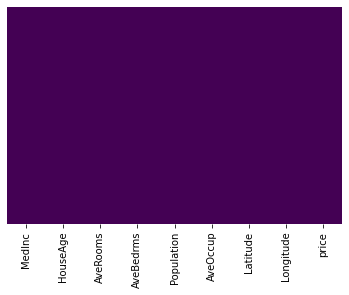

In [10]:
# To check missing values
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")


In [11]:
X_data = df.drop(["price"], axis=1).values
y_data = df["price"].values
print("X_data : ",X_data.shape," y_data : ",y_data.shape)

X_data :  (20640, 8)  y_data :  (20640,)


In [12]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_data)
X_sts = scaler.transform(X_data)

In [78]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_sts, 
              y_data, test_size= 0.20, random_state=100)
# Val set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full
                                                      , test_size= 0.10)

print("X_train  = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test   = ",X_test.shape ," y_test = ", y_test.shape)
print("X_valid  = ",X_valid.shape ," y_valid = ", y_valid.shape)


X_train  =  (14860, 8)  y_train =  (14860,)
X_test   =  (4128, 8)  y_test =  (4128,)
X_valid  =  (1652, 8)  y_valid =  (1652,)


In [79]:
# Creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation="relu", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu")) # price > 0, so, relu

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
# Compiling the model
# https://keras.io/models/sequential/
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mse"])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))
# history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)


Epoch 1/100
117/117 [==============================] - 1s 5ms/step - loss: 1.1459 - mse: 1.1459 - val_loss: 0.6139 - val_mse: 0.6139
Epoch 2/100
117/117 [==============================] - 1s 5ms/step - loss: 0.5438 - mse: 0.5438 - val_loss: 0.5261 - val_mse: 0.5261
Epoch 3/100
117/117 [==============================] - 1s 4ms/step - loss: 0.4809 - mse: 0.4809 - val_loss: 0.4985 - val_mse: 0.4985
Epoch 4/100
117/117 [==============================] - 1s 4ms/step - loss: 0.4505 - mse: 0.4505 - val_loss: 0.4621 - val_mse: 0.4621
Epoch 5/100
117/117 [==============================] - 1s 4ms/step - loss: 0.4333 - mse: 0.4333 - val_loss: 0.4891 - val_mse: 0.4891
Epoch 6/100
117/117 [==============================] - 1s 5ms/step - loss: 0.4216 - mse: 0.4216 - val_loss: 0.4305 - val_mse: 0.4305
Epoch 7/100
117/117 [==============================] - 1s 4ms/step - loss: 0.4118 - mse: 0.4118 - val_loss: 0.4912 - val_mse: 0.4912
Epoch 8/100
117/117 [==============================] - 1s 5ms/step - 

Epoch 62/100
117/117 [==============================] - 1s 4ms/step - loss: 0.2991 - mse: 0.2991 - val_loss: 0.3418 - val_mse: 0.3418
Epoch 63/100
117/117 [==============================] - 1s 4ms/step - loss: 0.2979 - mse: 0.2979 - val_loss: 0.3872 - val_mse: 0.3872
Epoch 64/100
117/117 [==============================] - 1s 4ms/step - loss: 0.2965 - mse: 0.2965 - val_loss: 0.3447 - val_mse: 0.3447
Epoch 65/100
117/117 [==============================] - 1s 4ms/step - loss: 0.2965 - mse: 0.2965 - val_loss: 0.4668 - val_mse: 0.4668
Epoch 66/100
117/117 [==============================] - 1s 4ms/step - loss: 0.2977 - mse: 0.2977 - val_loss: 0.4404 - val_mse: 0.4404
Epoch 67/100
117/117 [==============================] - 1s 5ms/step - loss: 0.2963 - mse: 0.2963 - val_loss: 0.3421 - val_mse: 0.3421
Epoch 68/100
117/117 [==============================] - 1s 4ms/step - loss: 0.2939 - mse: 0.2939 - val_loss: 0.3341 - val_mse: 0.3341
Epoch 69/100
117/117 [==============================] - 1s 4ms

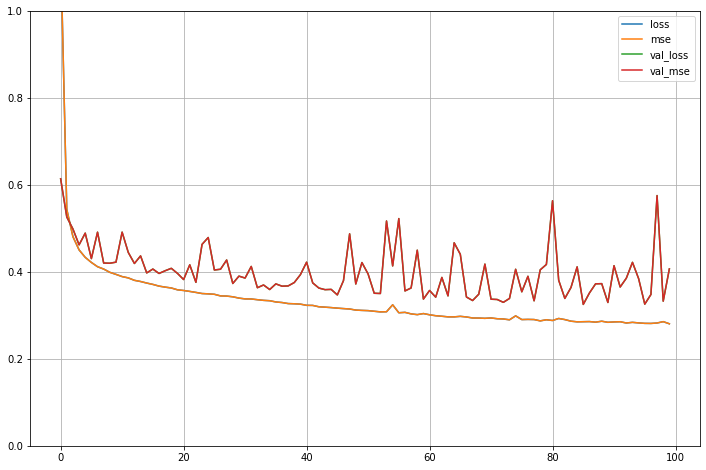

-----------------------------------------------------------------------
129/129 [==============================] - 0s 2ms/step - loss: 0.3796 - mse: 0.3796
Loss                   :  0.3795671761035919
Mean Squared Error     :  0.3795671761035919


In [81]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                   : ",model_evaluate[0])
print("Mean Squared Error     : ",model_evaluate[1])


In [82]:
# Comparison of the actual results with the predicted results
predicted = model.predict(X_test)

# Model evaluation
print("Mean Absolute Error    : ", metrics.mean_absolute_error(y_test, predicted))  
print("Mean Squared Error     : ", metrics.mean_squared_error(y_test, predicted))  
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("r2_score               : ", metrics.r2_score(y_test, predicted))

print("-----------------------------------------------------------------------")
df_data = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": predicted.flatten()})
print(df_data.head(15))
print("-----------------------------------------------------------------------")

Mean Absolute Error    :  0.41544641093367757
Mean Squared Error     :  0.3795671028723681
Root Mean Squared Error:  0.6160901743027299
r2_score               :  0.718296069600421
-----------------------------------------------------------------------
    Actual  Predicted
0    2.453   2.506480
1    1.042   1.195765
2    1.462   1.615374
3    1.542   1.027607
4    3.242   1.888590
5    1.411   1.435939
6    2.273   1.869372
7    2.023   2.119568
8    1.702   0.911963
9    3.018   3.012913
10   1.522   1.554221
11   3.081   3.140719
12   4.850   4.073991
13   1.625   1.672272
14   2.250   2.651540
-----------------------------------------------------------------------
